# EDA данных для задачи на классификацию

<font size=4><b>Цель проекта</b> - обработка данных, анализ и определение факторов, влияющих на стоимость дома в Мумбаи</font>

<h1>Содержание<span class="tocSkip"></span></h1>

## Инициализация проекта

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [410]:
data = pd.read_csv('mumbai_houses_task.csv')

# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `price` - стоимость дома;
- `area` - площадь дома;
- `latitude` - широта местоположения дома;
- `longitude` - долгота местоположения дома;
- `Bedrooms` - количество спален;
- `Bathrooms` - количество ванных комнат;
- `Balcony` - количество балконов;
- `Status` - статус продажи дома;
- `neworold` - состояние дома;
- `parking` - количество парковочных мест;
- `Furnished_status` - состояние стройки;
- `Lift` - количество лифтов в доме;
- `type_of_building` - тип дома.
</font>

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [412]:
data.head(1000)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22500000.0,950.0,19.117056,72.902024,2.0,2.0,4.0,Ready to Move,Resale,4.0,NaN,4.0,Flat
996,17500000.0,740.0,19.106679,72.915486,2.0,2.0,0.0,Ready to Move,Resale,0.0,NaN,0.0,Flat
997,16500000.0,850.0,19.151252,72.940475,2.0,2.0,0.0,Ready to Move,New Property,0.0,NaN,0.0,Flat
998,55000000.0,2030.0,19.188972,72.822006,4.0,4.0,0.0,Ready to Move,Resale,0.0,Semi-Furnished,0.0,Flat


<font size=4><b>Полученная характеристика исходных данных:</b>

- в столбцах 'Status' и 'Furnished_status' отсутствую значения.

<font size=4>Столбцы с неподходящими типами данных:

- изменение типа данных столбца 'price' с float на int, хоть некоторые дома и имеют не нулевые значения после точки, это скорее всего погрешности;
- изменение типа данных столбца 'area' с float на int;
- изменение типа данных столбца 'Bedrooms' с float на int;
- изменение типа данных столбца 'Bathrooms' с float на int;
- изменение типа данных столбца 'Balcony' с float на int;
- изменение типа данных столбца 'parking' с float на int;
- изменение типа данных столбца 'Lift' с float на int;
</font>

Приведу столбцы 'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'Furnished_status', 'Lift' в нижний регистр для упрощения работы с данными.

In [413]:
data.columns = data.columns.str.lower()
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,Ready to Move,Resale,0.0,Semi-Furnished,0.0,Flat
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,Ready to Move,Resale,1.0,Unfurnished,1.0,Flat
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,Ready to Move,Resale,0.0,NaN,0.0,Flat
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,Ready to Move,Resale,0.0,Furnished,0.0,Flat


<font size=4> Краткое описание пропущенных значений во всех столбцах:

Датасет является практически полноценным, за исключением того, что лишь в столбцах 'status' и 'furnished_status' отсутствую значения.

# <font> Выводы и дальнейшие шаги</font>

Вывод <b>описательной статистики</b> для кадра данных pandas.
<br> Описательная статистика отображается для всех числовых столбцов в кадре данных. Если в каких-либо столбцах отсутствуют значения (NaN), Pandas автоматически исключат эти значения при расчете описательной статистики.
<br>
Для числовых данных результат будет включать count (количество), mean (среднее), std (стандартное отклонение), min, max, а также нижний, 50 -й и верхний процентили. По умолчанию <i>нижний процентиль</i> равен 25 , а <i>верхний процентиль</i> равен 75 . 50 - й процентиль <i>совпадает с медианой</i>.

In [414]:
data.describe()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,parking,lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


In [415]:
# Проверка на совпадение столбцов 'balcony', 'parking', 'lift'

(data['balcony'] == data['parking']).all() and (data['balcony'] == data['lift']).all()

np.True_

**Заключение**

- Наглядно видно, что столбцы 'balcony', 'parking', 'lift' полностью идентичны;
- Изменить тип значений у таких признаков: 'price', 'area', 'bedrooms', 'bathrooms', 'balcony', 'parking', 'lift' с float на int;
- Обработать пропущенные значения;
- Заменить значения в столбцах 'status', 'neworold', 'furnished_status' на бинарные значения.

- Изменить тип значений у таких признаков: 'price', 'area', 'bedrooms', 'bathrooms', 'balcony', 'parking', 'lift' с float на int;
- Обработать пропущенные значения;
- Заменить значения в столбцах 'status', 'neworold', 'furnished_status' на бинарные значения.

# Обработка пропущенных значений

In [416]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

furnished_status    42.446043
status               7.689848
latitude             0.000000
area                 0.000000
price                0.000000
bedrooms             0.000000
longitude            0.000000
balcony              0.000000
bathrooms            0.000000
neworold             0.000000
parking              0.000000
lift                 0.000000
type_of_building     0.000000
dtype: float64

<font size=4><b>Недостающее значение данных в следующих столбцах:</b>

- finished_status
- status
</font>

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

- Заполнить пропуски значений в столбце 'status' на основе признака 'neworold';
- Заполнить пропущенные значения в столбце 'furnished_status' на основе двух признаков 'neworold' и 'status'

In [417]:
# Заполнение пропусков в столбце 'status'

f = lambda x: x.mode()[0] if x.notna().any() else np.nan
grouped_status = data.groupby('neworold')['status'].transform(f)
data['status'] = data['status'].fillna(grouped_status)
data.head(100)

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,Ready to Move,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26700000.0,2017.0,19.165781,72.934534,3.0,3.0,0.0,Ready to Move,New Property,0.0,Unfurnished,0.0,Flat
96,60000000.0,1800.0,19.098821,72.832072,3.0,3.0,3.0,Ready to Move,Resale,3.0,Semi-Furnished,3.0,Flat
97,33500000.0,1540.0,19.123709,72.892867,3.0,3.0,1.0,Ready to Move,New Property,1.0,Semi-Furnished,1.0,Flat
98,54000000.0,3018.0,19.174674,72.943104,4.0,5.0,1.0,Ready to Move,New Property,1.0,Unfurnished,1.0,Flat


In [418]:
# Заполнение пропусков в столбце 'furnished_status' на основе 'status' и 'neworold'

grouped_furnished_status = data.groupby(['neworold', 'status'])['furnished_status'].transform(f)
data['furnished_status'] = data['furnished_status'].fillna(grouped_furnished_status)

# После заполнения осталось 3 пропущенных значения, заменю их на моду данного признака

data['furnished_status'] = data['furnished_status'].fillna(data['furnished_status'].mode()[0])
data.head(100)

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,Unfurnished,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,Unfurnished,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,Ready to Move,New Property,0.0,Unfurnished,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26700000.0,2017.0,19.165781,72.934534,3.0,3.0,0.0,Ready to Move,New Property,0.0,Unfurnished,0.0,Flat
96,60000000.0,1800.0,19.098821,72.832072,3.0,3.0,3.0,Ready to Move,Resale,3.0,Semi-Furnished,3.0,Flat
97,33500000.0,1540.0,19.123709,72.892867,3.0,3.0,1.0,Ready to Move,New Property,1.0,Semi-Furnished,1.0,Flat
98,54000000.0,3018.0,19.174674,72.943104,4.0,5.0,1.0,Ready to Move,New Property,1.0,Unfurnished,1.0,Flat


In [419]:
data.isna().sum()

price               0
area                0
latitude            0
longitude           0
bedrooms            0
bathrooms           0
balcony             0
status              0
neworold            0
parking             0
furnished_status    0
lift                0
type_of_building    0
dtype: int64

## Коррекция типов данных

Т.к. данные полные, то можно скорректировать типы данных

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   bedrooms          6255 non-null   float64
 5   bathrooms         6255 non-null   float64
 6   balcony           6255 non-null   float64
 7   status            6255 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  furnished_status  6255 non-null   object 
 11  lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [421]:
# Замена float на int

data['price'] = data['price'].astype(int)
data['area'] = data['area'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parking'] = data['parking'].astype(int)
data['lift'] = data['lift'].astype(int)

In [422]:
print("Уникальные значения в 'status':", data['status'].unique())
print("Уникальные значения в 'neworold':", data['neworold'].unique())
print("Уникальные значения в 'furnished_status':", data['furnished_status'].unique())
print("Уникальные значения в 'type_of_building':", data['type_of_building'].unique())

Уникальные значения в 'status': ['Under Construction' 'Ready to Move']
Уникальные значения в 'neworold': ['New Property' 'Resale']
Уникальные значения в 'furnished_status': ['Unfurnished' 'Semi-Furnished' 'Furnished']
Уникальные значения в 'type_of_building': ['Flat' 'Individual House']


In [423]:
# Замена значений в 'status', 'neworold', 'furnished_status' на бинарные

data['status'] = data['status'].map({'Under Construction': 0, 'Ready to Move': 1})
data['neworold'] = data['neworold'].map({'New Property': 1, 'Resale': 0})
data['furnished_status'] = data['furnished_status'].map({'Unfurnished': 0, 'Semi-Furnished': 2, 'Furnished': 1})
data['type_of_building'] = data['type_of_building'].map({'Flat': 0, 'Individual House': 1})

### **Проверка "очищенных" данных**

In [424]:
# Проверка дубликатов

data.duplicated().sum()

np.int64(18)

Т.к. датасет содержит дубликаты, необходимо их удалить.

In [425]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

Теперь данные готовы к обработке, проверим сводную информацию.

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6237 non-null   int64  
 1   area              6237 non-null   int64  
 2   latitude          6237 non-null   float64
 3   longitude         6237 non-null   float64
 4   bedrooms          6237 non-null   int64  
 5   bathrooms         6237 non-null   int64  
 6   balcony           6237 non-null   int64  
 7   status            6237 non-null   int64  
 8   neworold          6237 non-null   int64  
 9   parking           6237 non-null   int64  
 10  furnished_status  6237 non-null   int64  
 11  lift              6237 non-null   int64  
 12  type_of_building  6237 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 682.2 KB


In [427]:
data.head(100)

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26700000,2017,19.165781,72.934534,3,3,0,1,1,0,0,0,0
96,60000000,1800,19.098821,72.832072,3,3,3,1,0,3,2,3,0
97,33500000,1540,19.123709,72.892867,3,3,1,1,1,1,2,1,0
98,54000000,3018,19.174674,72.943104,4,5,1,1,1,1,0,1,0


Данные выглядят "чистыми" и готовы к EDA.

# EDA

## Исследование основных параметров дома

Параметры:
- Цена
- Размеры: площадь, количество спален и ванных комнат;
- Статус продажи;
- Состояние дома: новый/нет;
- Состояние стройки.

На эти перечисленные параметры будет обращено особое внимание с помощью гистограмм. Здесь выбросы будут влиять на форму и читаемость гистограмм.

In [428]:
data.describe()[['price', 'area', 'bedrooms', 'bathrooms', 'status', 'neworold', 'furnished_status']]

,price,area,bedrooms,bathrooms,status,neworold,furnished_status
count,6.237000e+03,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,2.686215e+07,1185.597723,2.452301,2.425525,0.999519,0.118326,0.546577
std,2.792125e+07,637.515522,0.750140,0.763236,0.021928,0.323020,0.794436
min,1.500000e+06,503.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,3.000000,3.000000,1.000000,0.000000,1.000000
max,3.600000e+08,8000.000000,10.000000,10.000000,1.000000,1.000000,2.000000


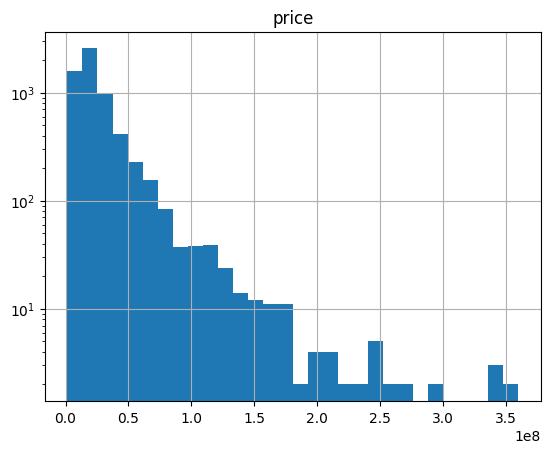

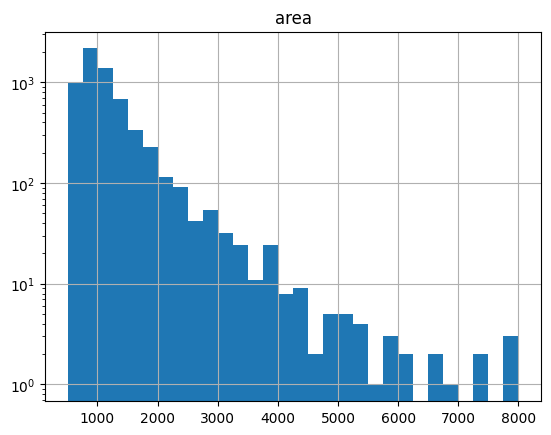

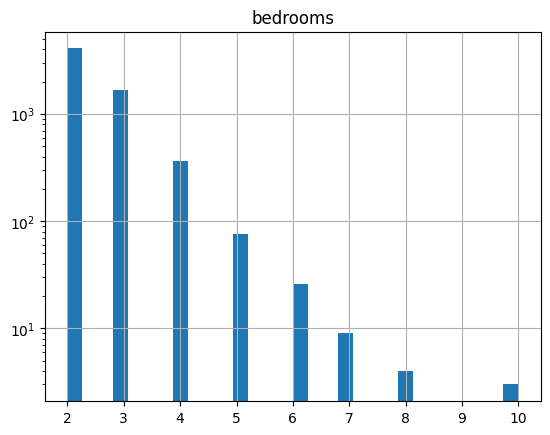

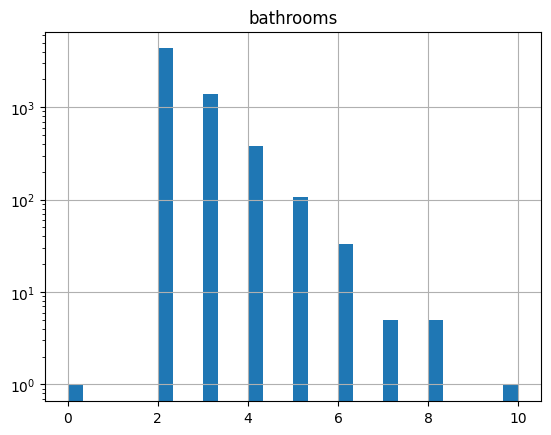

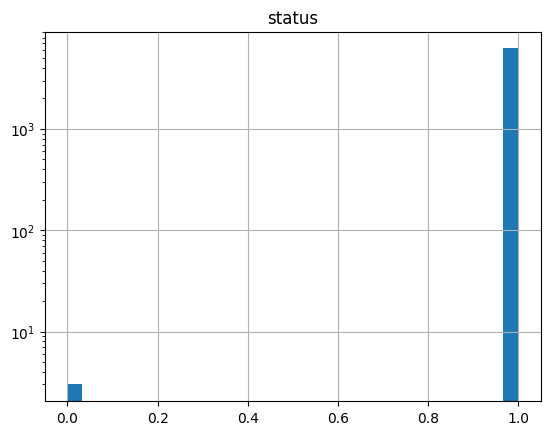

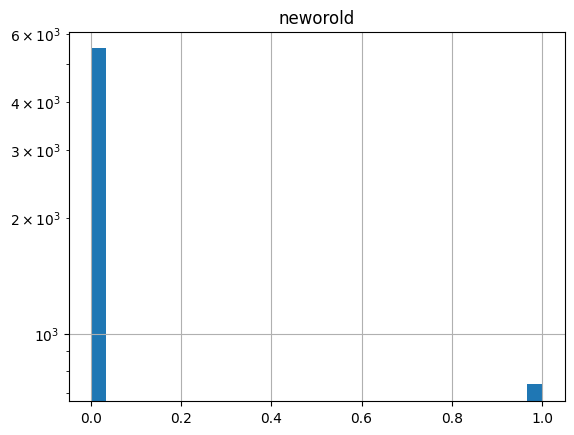

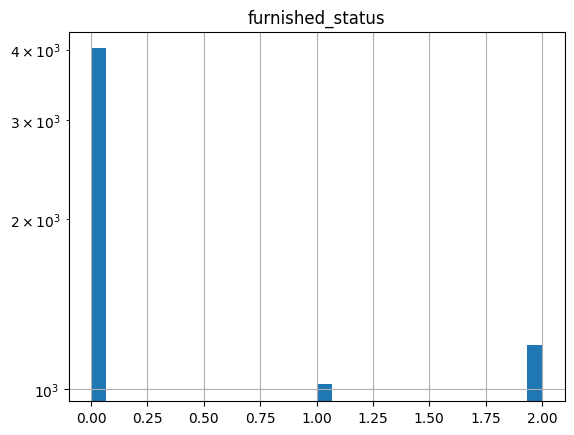

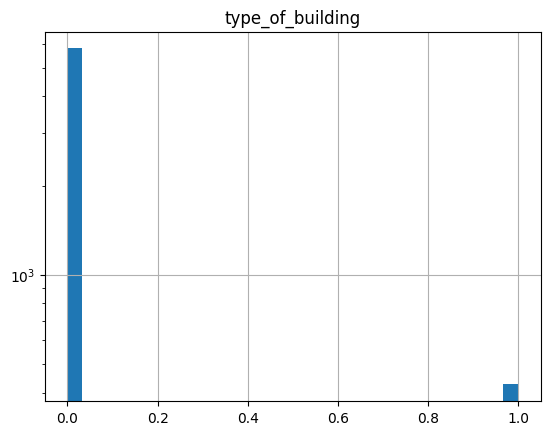

In [429]:
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'status', 'neworold', 'furnished_status', 'type_of_building']

for column in columns:
    data.hist(column, bins=30, log=True)

**Заключение**

- Присутствует небольшие выбросы, которые мешают чтению данных
- Все, кроме бинарных, графики имеют отклонение влево, значит у таких распределений среднее меньше медианы

## Изучение и обработка выбросов

Учитывая приведенные выше результаты, столбцы, содержащие выбросы, — это 'price', 'area', 'bedrooms', 'bathrooms'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [430]:
outlier = data[['price', 'area', 'bedrooms', 'bathrooms']]
outlier

,price,area,bedrooms,bathrooms
0,22400000,629,2,2
1,35000000,974,3,2
2,31700000,968,3,3
3,18700000,629,2,2
4,13500000,1090,2,2
...,...,...,...,...
6250,19500000,810,2,2
6251,22000000,1400,3,3
6252,20000000,750,2,2
6253,11000000,700,2,2


In [431]:
# Нижний предел

Q1 = outlier.quantile(0.25)
Q1

price        13000000.0
area              846.0
bedrooms            2.0
bathrooms           2.0
Name: 0.25, dtype: float64

In [432]:
# Верхний предел

# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

price        30000000.0
area             1300.0
bedrooms            3.0
bathrooms           3.0
Name: 0.75, dtype: float64

In [433]:
# IQR-оценки

IQR = Q3-Q1

# Отфильтрованные данные, из которых удалены выбросы

data_filtered = outlier[~((outlier < (Q1 - 2 * IQR)) |(outlier > (Q3 + 2 * IQR))).any(axis=1)]
data_filtered

,price,area,bedrooms,bathrooms
0,22400000,629,2,2
1,35000000,974,3,2
2,31700000,968,3,3
3,18700000,629,2,2
4,13500000,1090,2,2
...,...,...,...,...
6250,19500000,810,2,2
6251,22000000,1400,3,3
6252,20000000,750,2,2
6253,11000000,700,2,2


In [434]:
# Копирование индексов

index_list = list(data_filtered.index.values)

In [435]:
# Хранить данные без выбросов в отдельном DataFrame.

data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0


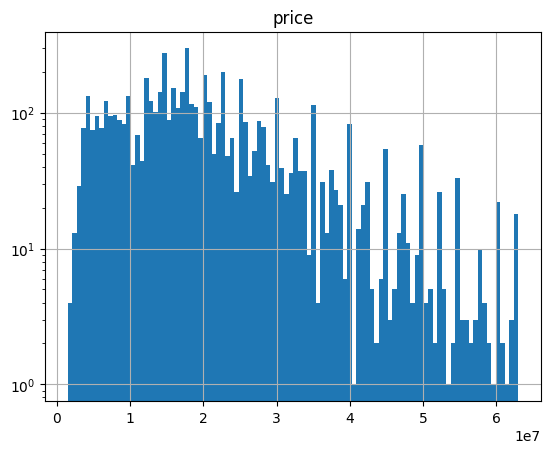

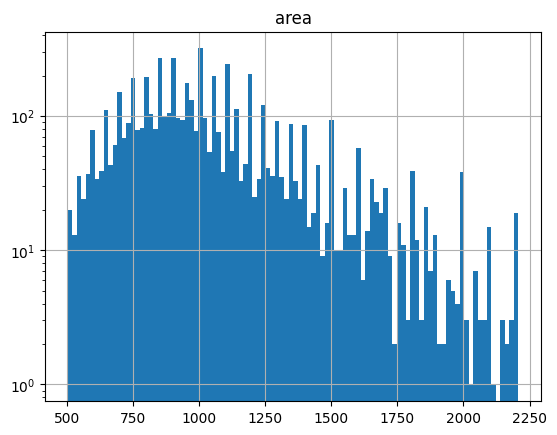

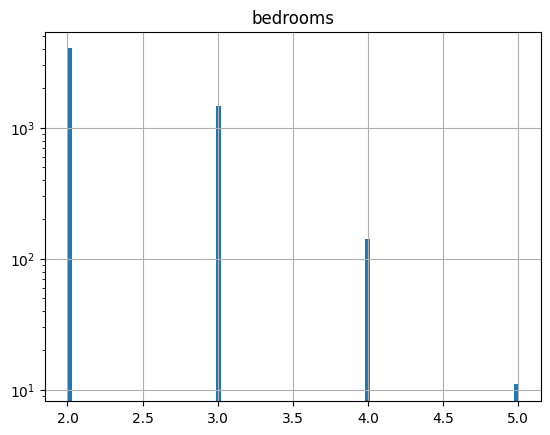

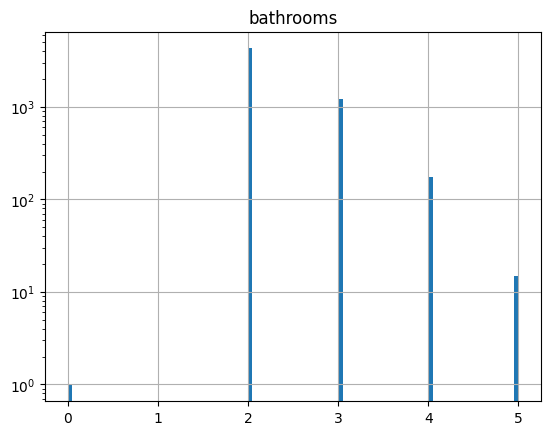

In [436]:
# создать гистограмму с отфильтрованным выбросом

filtered_outlier = data_filtered[['price', 'area', 'bedrooms', 'bathrooms']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100, log=True)

## Изучение основных параметров без выбросов

В этом разделе отфильтрованные данные будут использоваться для построения новых графиков по сравнению с предыдущими, которые включали выбросы.

[[<Axes: title={'center': 'price'}>]]
[[<Axes: title={'center': 'price'}>]]


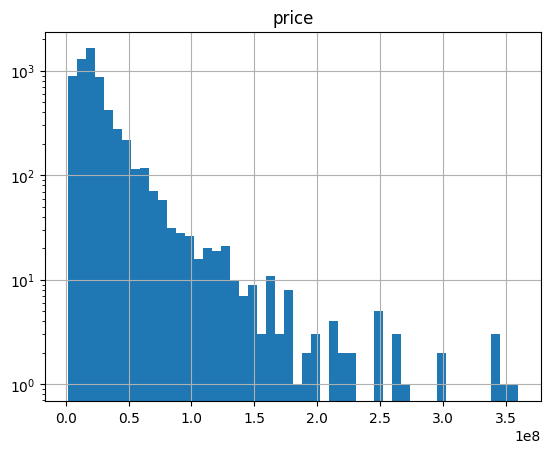

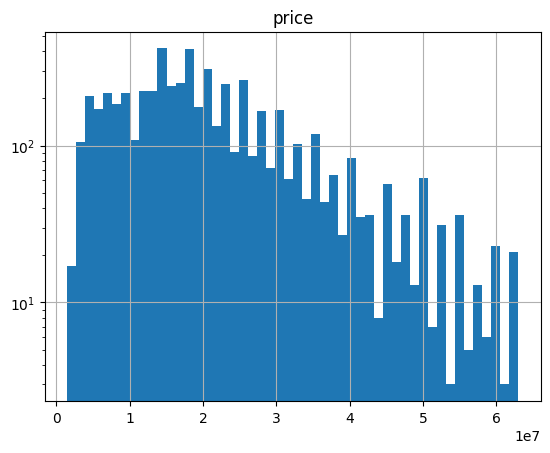

In [437]:
# Сравнение цены

print(data.hist('price', bins=50, log=True))
print(data_filtered.hist('price', bins=50, log=True))

**Заключение**

- Разброс был уменьшен с 3.5\*1e8 до 6.2\*1e7, но распределение всё также завалено влево

[[<Axes: title={'center': 'area'}>]]
[[<Axes: title={'center': 'area'}>]]


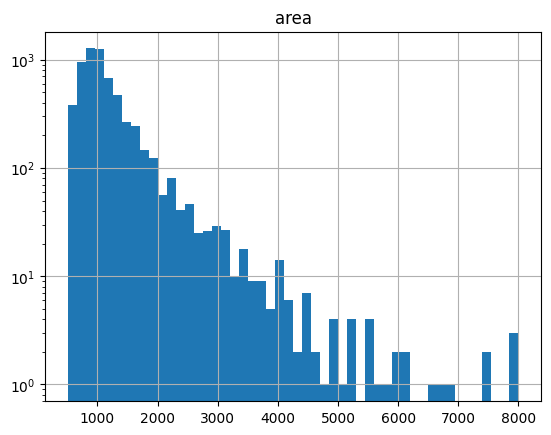

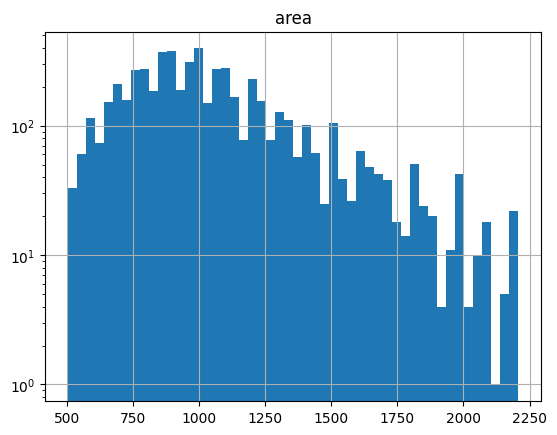

In [438]:
# Сравнение площади

print(data.hist('area', bins=50, log=True))
print(data_filtered.hist('area', bins=50, log=True))

**Заключение**

- Разброс уменьшен с 8000 до 2200, также завален влево

[[<Axes: title={'center': 'bedrooms'}>]]
[[<Axes: title={'center': 'bedrooms'}>]]


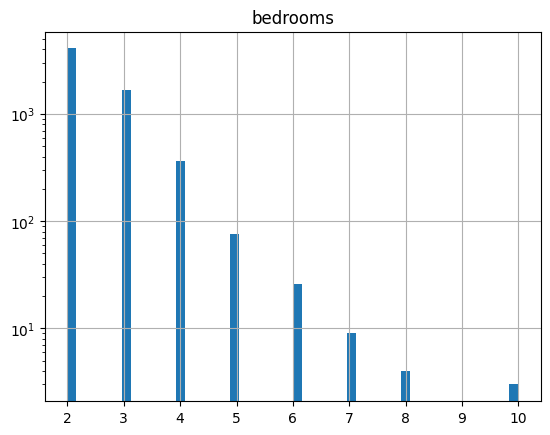

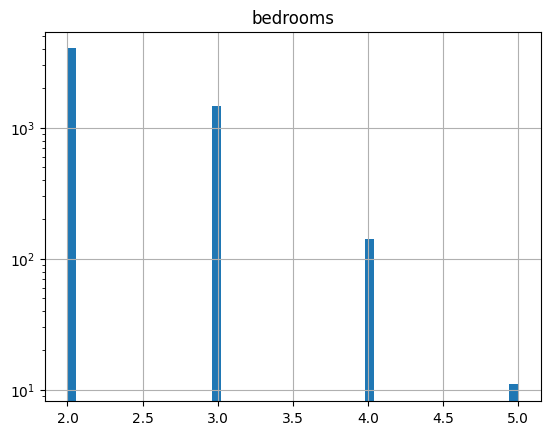

In [439]:
# Сравнение спален

print(data.hist('bedrooms', bins=50, log=True))
print(data_filtered.hist('bedrooms', bins=50, log=True))

**Заключение**

- Разброс был уменьшен с 10 до 5, распределение также завалено влево

[[<Axes: title={'center': 'bathrooms'}>]]
[[<Axes: title={'center': 'bathrooms'}>]]


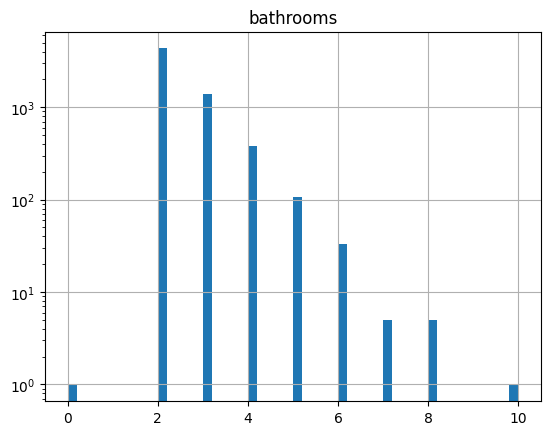

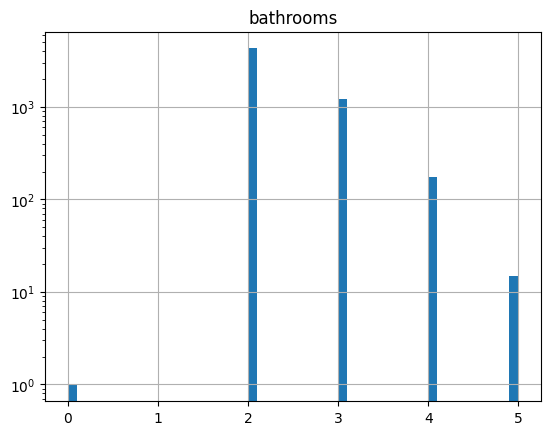

In [440]:
# Сравнение количества ванных

print(data.hist('bathrooms', bins=50, log=True))
print(data_filtered.hist('bathrooms', bins=50, log=True))

**Заключение**

- Разброс был уменьшен с 10 до 5, распределение также завалено влево

# Нахождение зависимостей 'price' с другими признаками

In [441]:
correlation_matrix = data_filtered.corr()
price_correlation_matrix = correlation_matrix[['price']]
print(price_correlation_matrix)

                     price
price             1.000000
area              0.540119
latitude         -0.582393
longitude        -0.180729
bedrooms          0.475150
bathrooms         0.484191
balcony          -0.016290
status           -0.017291
neworold          0.034314
parking          -0.016290
furnished_status  0.001046
lift             -0.016290
type_of_building -0.011743


**Заключение**

- Видно, что признаков с отрицательным и положительным коэффициентами равное количество;
- Дальше изучим зависимости 'price' от тех признаков, где корреляция больше модуля 0.3;

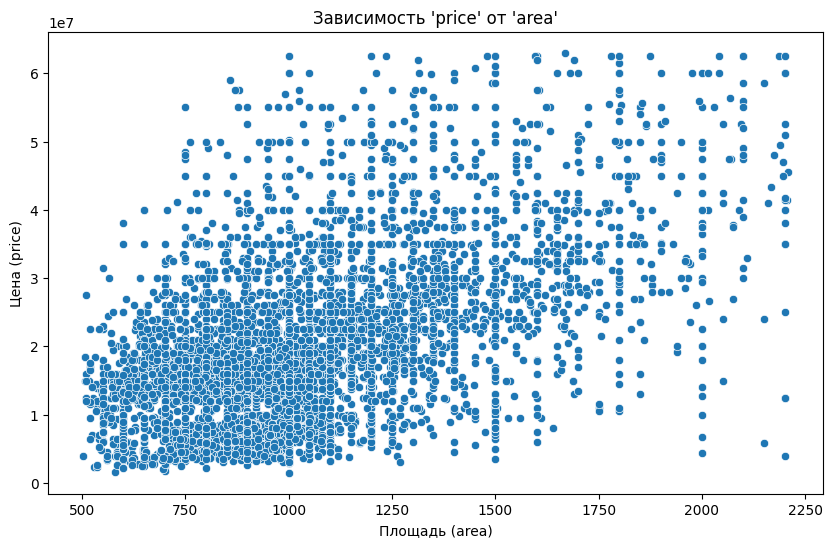

In [444]:
# Зависимость 'price' от 'area'

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_filtered, x='area', y='price')
plt.title("Зависимость 'price' от 'area'")
plt.xlabel("Площадь (area)")
plt.ylabel("Цена (price)")
plt.show()

**Заключение**

- По графику хорошо видно, что в промежутке до 3\*1e7 скопление большого количества домов/квартир;
- Коэффициент корреляции указывает на то, что имеется довольно хорошая зависимость, и чем больше площадь дома/квартиры, тем выше его/её цена;

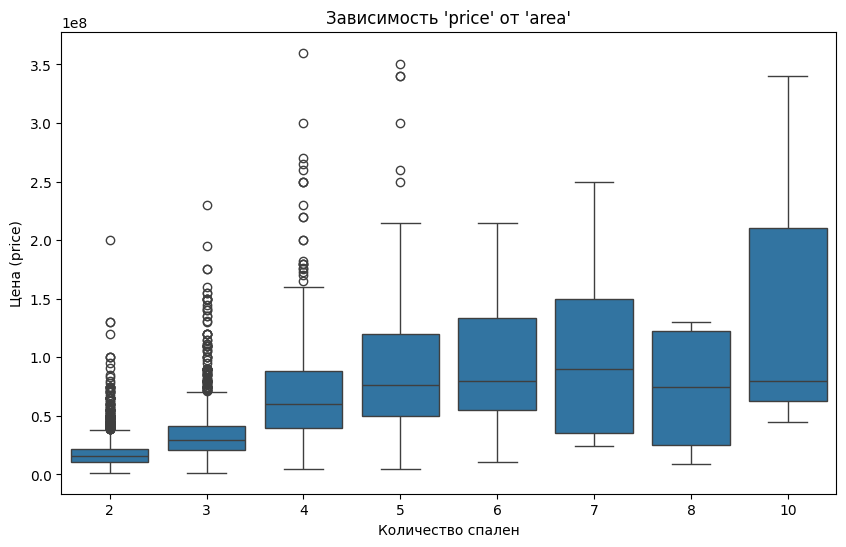

In [ ]:
# Зависимость 'price' от 'bedrooms'

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='bedrooms', y='price')
plt.title("Зависимость 'price' от 'bedrooms'")
plt.xlabel("Количество спален")
plt.ylabel("Цена (price)")
plt.show()

**Заключение**

- По графику видно, что начиная с 4 спальных домов/квартир медианные значения цен близки друг к другу;
- Смотря на график и учитывая коэффициент корреляции можно смело сказать, что чем больше в доме/квартире спален тем выше цена.

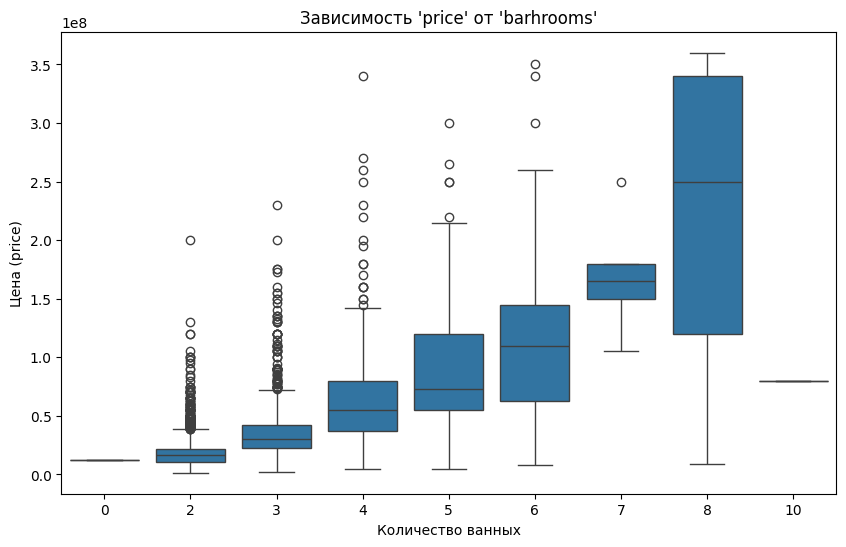

In [447]:
# Зависимость 'price' от 'bathrooms'

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='bathrooms', y='price')
plt.title("Зависимость 'price' от 'barhrooms'")
plt.xlabel("Количество ванных")
plt.ylabel("Цена (price)")
plt.show()

**Заключение**

- По графику видно, что при отсутствии или 10 ванных комнат дома/квартиры продаются по конкретной одной цене соответственно;
- Очень хорошо видна зависимость цены от количества ванных комнат, на что указывает и коэффициент корреляции;
- Гипотеза: чем больше ванных комнат в доме/квартире, тем выше цена.

# Общие выводы:

Этот проект призван изучить данные и определить, какие факторы влияют на установку бомбы в игре CS:GO. Вначале, после загрузки данных и всех необходимых библиотек, образцы данных и общее резюме выводятся на экран для их анализа. Необходимо выявить "аномальные" данные, отсутствующие значения и некорректные типы данных.

Заполнить пропущенные значения, сравнив их с другими столбцами (если они связаны):

- Заполнить пропуски значений в столбце 'status' на основе признака 'neworold';
- Заполнить пропущенные значения в столбце 'furnished_status' на основе двух признаков 'neworold' и 'status'

**Изменение типа данных:**

- Изменить тип значений у таких признаков: 'price', 'area', 'bedrooms', 'bathrooms', 'balcony', 'parking', 'lift' с float на int

**Редактирование данных:**

- Заменил значения у столбцов 'status', 'neworold', 'furnished_status' и 'type_of_building' на бинарные;
- Проверка дублированных данных и их удаление.

**Проверка выбросов:**

- Выбросы параметров: цена, площадь, количество ванных и спальных комнат;
- На всех гистограммах с числовыми значениями распределения смещены влево

**Удаление выбросов:**

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame;
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов;

**Изучение факторов влияющих на цену:**

Факторы, влияющие на цену: площадь, количество ванных и спальных комнат

*Площадь*

Проглядывается хорошая зависимость цены от площади, на это также указывает коэффициент корреляции.

*Количество ванных и спальных комнат*

Оба этих признака среднее влияют на цену, хоть коэффициент у обоих показателей одинаковый, по коробчатой диаграмме прогладывается зависимость такая, что количество ванных производит большее влияние.

*Итог*

Можно смело сказать, что больше всего на цену дома/квартиры влияют его/её размеры: площадь, количество ванных и спален.

*Дополнительно*

Не стал рассматривать зависимость от широты, хоть коэффициент корреляции является наибольшим из всех, я посчитал это неправильным, т.к. мы и так рассматриваем конкретную территорию, т.е. широта везде близка друг к другу, даже среднеквадратичное отклонение равно ~0.1